In [22]:
import sys
sys.path.append("/Users/l.chanussot/perso/carvana/")

In [23]:
from carvana.ImageMaskIterator import ImageMaskIterator
from carvana.contours import get_contours_batch
from carvana.augmentation import random_transformation

import json
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
with open("../data/train.json", "r") as jfile:
    train_ids = json.load(jfile)

In [25]:
test_iter = ImageMaskIterator(image_dir="/Users/l.chanussot/perso/carvana/data/train_960x640/",
                              image_ids=train_ids,
                              mask_dir="/Users/l.chanussot/perso/carvana/data/train_masks_960x640/",
                              ypreprocess=get_contours_batch,
                              data_augmentation=random_transformation,
                              target_shape=(512, 512),
                              n_patches_per_image=4,
                              batch_size=8)
                              #debug_dir="../data/debug/")

In [26]:
for bx, by in test_iter:
    break

In [27]:
test_iter.distribution()

100% (508 of 508) |#######################| Elapsed Time: 0:03:32 Time: 0:03:32


defaultdict(int, {0: 635905767, 1: 5448395, 2: 418413783, 3: 5585271})

In [34]:
distribution ={0: 635905767, 1: 5448395, 2: 418413783, 3: 5585271}

In [28]:
s = 635905767 + 5448395 + 418413783 + 5585271

In [32]:
s/5585271

190.74333474597742

In [42]:
import numpy as np

In [58]:
def get_weights(distribution):
    max_cnt = -1
    max_cls = -1
    for cls, cnt in distribution.items():
        if cnt > max_cnt:
            max_cnt = cnt
            max_cls = cls
    weights = dict()
    sum_w = 0
    for cls, cnt in distribution.items():
        weights[cls] = max_cnt/cnt
        sum_w += weights[cls]
    weights_normed = np.zeros((len(weights)))
    for cls, w in weights.items():
        weights_normed[cls] =  weights[cls]/sum_w
    return weights_normed

In [59]:
get_weights(distribution)/2

array([ 0.00214511,  0.25036517,  0.00326014,  0.24422957])

In [20]:
423999054/(641354162 + 423999054)

0.3979891810830184

In [21]:
1*(0.6/0.39)

1.5384615384615383

In [7]:
bx.shape

(8, 512, 512, 3)

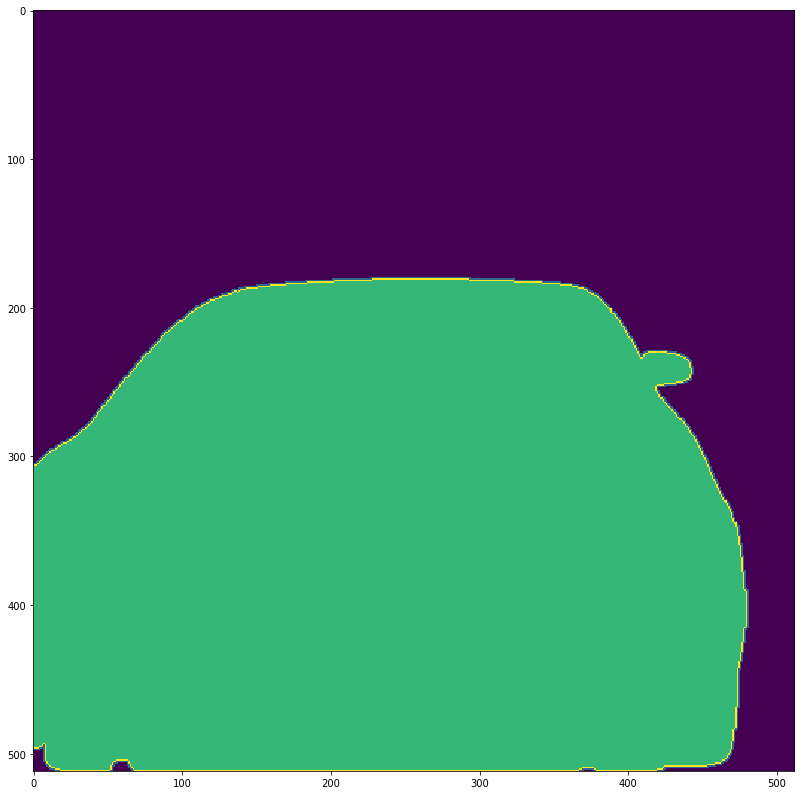

In [9]:
plt.figure(figsize=(20, 14))
plt.imshow(by[2, :, :, 0])

In [ ]:
test_iter.distribution(400)

In [ ]:
12922563/(48517437 + 12922563)

In [ ]:
1/0.21

In [ ]:
48517437/12922563